In [6]:
import numpy as np

import h5py
import matplotlib.pyplot as plt


#import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


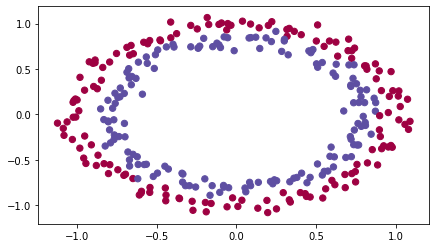

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
#from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
#from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

## sigmoid_functin

In [7]:
def sigmoid(z):
    A=(1/(1+exp(-z)))
    cache=z
    return A,cache

## relu

In [8]:
def relu(z):
    A=np.maximum(0,z)
    assert(A.shape==z.shpae)
    cache=z
    return A,cache

## relu_backward

In [9]:
def relu_backward(dA,cache):
    z=cache
    dz=np.array(dA,copy=True)
    dz[z<=0]=0
    assert(dz.shape==z.shape)
    
    return dz

## sigmoid_backward

In [10]:
def sigmoid_backward(dA,cache):
    z=cache
    s=1/(1+np.exp(-z))
    dz=dA*s(1-s)
    assert(dz.shape==z.shape)
    return dz

## initialize_parameter

In [11]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(1)
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    assert(w1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(w2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters={'w1':w1,
                'b1':b1,
               'w2':w2,
               'b2':b2}
    return parameters
    

## deep_initialization parameters

In [12]:
def initialize_parameter_deep(layer_dims):
    np.random.seed(3)
    parameters={}
    L=len(layer_dims)
    for i in range(1,L):
        parameters['w'+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*0.01
        parameters['b'+str(i)]=np.zeros((layer_dims[i],0))
        
        assert(parameters['w'+str(i)].shape==(layer_dims[i],layer_dims[i-1]))
        assert(parameters['b'+str(i)].shape==(layer_dims[i],1))
    return parameters    
    

## linear_forward

In [13]:
def linear_forward(A,w,b):
    z=np.dot(w,A)+b
    assert(z.shape==(w.shape[0],A.shape[1]))
    cache=(A,w,b)
    return z,cache

    

## linear_activation_forward

In [14]:
def linear_activation_forward(A_prev,w,b,activation):
    if activation=='sigmoid':
        z,linear_cache=linear_forward(A_prev,w,b)
        A,activation_cache=sigmoid(z)
    elif activation=='sigmoid':
        z,linear_cache=linear_forward(A_prev,w,b)
        A,activation_cache=relu(z)
        
    assert(A.shape==(w.shape[0],A_prev.shape[1]))
    cache=(linear_cache,activation_cache)
    return A,cache

## L_layer_activation_forward

In [15]:
def L_mode_linear_forward(X,parameters):
    caches=[]
    A=X
    L=len(parameters)//2
    for i in range(1,L):
        A_prev=A
        w=parameters['w'+str(i)]
        b=parameters['b'+str(i)]
        A,cache=linear_activation_forward(A_prev,w,b,activation='relu')
        caches.append(cache)
    w=parameters['w'+str(L)] 
    b=parameters['b'+str(L)]
    AL,cache=linear_activation_forward(A,w,b,activation='sigmoid')
    
    caches.append(cache)
    assert(AL.shape==(1,X.shape[1]))
    
    return AL,caches
    

## cost_function

In [16]:
def cost_function(AL,Y):
    m=Y.shape[1]
    cost=(-1/m)*(np.dot(Y,np.log(AL).T)+np.dot((1-Y),np.log(1-AL).T))
    cost=np.squeeze(cost)
    assert(cost.shape==())
    return cost
    

## Linear_backward

In [17]:
def linear_backward(dz,cache):
    A_prev,w,b=cache
    m=A_prev.shape[1]
    
    dw=(1/m)*np.dot(dz,A_prev.T)
    db=(1/m)*np.sum(dz,axis=1,keepdims=True)
    dA_prev=np.dot(w.T,dz)
    
    assert(dA_prev.shape==A_prev.shape)
    assert(dw.shape==w.shape)
    assert(db.shape==b.shape)
    
    return dA_prev,dw,db

## linear_backward

In [18]:
def linear_activation_backward(dA,cache,activation):
    linear_cache,activation_cache=cache
    if activation=='relu':
        dz=relu_backward(dA,activation_cache)
        dA_prev,dw,db=linear_backward(dz,linear_cache)
    elif activation=='sigmoid':
        dz=sigmlid_backward(dA,activation_cache)
        dA_prev,dw,db=linear_backward(dz,linear_cache)
    
    return dA_prev,dw,db 

## L_model_backward

In [19]:
def L_model_bakcward(AL,Y,caches):
    grads={}
    L=len(caches)
    m=AL.shape[1]
    Y=Y.shape(AL.shape)
    
    dAL=-(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    current_cache=caches[L-1]
    
    grads['dA'+str(L-1)],grads['dw'+str(L)],grads['db'+str(L)]=linear_activation_backward(dAL,current_cache,activation='sigmoid')
    
    for i in reversed(range(L-1)):
        current_cache=caches[i]
        
        dA_prev_temp,dw_temp,db_temp=linear_activation_bakward(grads['dA'+str(i+1)],current_cache,activation='relu')
        
        grads['dA'+str(i)]=dA_prev_temp
        grads['dw'+str(i+1)]=dw_temp
        grads['db'+str(i+1)]=db_temp
    
    return grads
        
    
    

### update_parameter

In [20]:
def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    for i in range(L):
        parameters['w'+str(i+1)]=parameters['w'+str(i+1)]-learning_rate*grads['dw'+str(i+1)]
        parameters['b'+str(i+1)]=parameters['b'+str(i+1)]-learning_rate*grads['db'+str(i+1)]
    return parameters


In [21]:

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
                         
    return parameters                     

        

In [22]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

NameError: name 'train_x' is not defined

In [23]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [24]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [25]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

NameError: name 'train_x' is not defined